In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
Iris_dataset = pd.read_table('iris.data', delimiter=',',header=None)

In [3]:
samples = np.zeros((Iris_dataset.shape[0], 4))
labels = np.zeros((Iris_dataset.shape[0], 1))

In [4]:
dic = {}
for i,category in enumerate(Iris_dataset[4].unique()):
    dic[category] = i

In [5]:
for row in range(Iris_dataset.shape[0]):
    samples[row][0] = Iris_dataset.iloc[row][0]
    samples[row][1] = Iris_dataset.iloc[row][1]
    samples[row][2] = Iris_dataset.iloc[row][2]
    samples[row][3] = Iris_dataset.iloc[row][3]
                               
    labels[row][0] = dic[Iris_dataset.iloc[row][4]]

# Split train and test

In [16]:
train_data = np.zeros((120, 4))
train_label = np.zeros((120, 1))
test_data = np.zeros((30, 4))
test_label = np.zeros((30, 1))
for i in range(3):
    num = int(samples.shape[0]/3)
    idx = list(range(num * i, num * (i+1)))
    np.random.shuffle(idx)
    
    split = int(num * 0.8)
    test_num = num - split
    train_idx = idx[:split]
    test_idx = idx[split:]
    
    train_data[split * i: split * (i+1)] = samples[train_idx]
    test_data[test_num * i: test_num * (i+1)] = samples[test_idx]
    train_label[split * i: split * (i+1)] = labels[train_idx]
    test_label[test_num * i: test_num * (i+1)] = labels[test_idx]

    

# idx = list(range(samples.shape[0]))
# np.random.shuffle(idx)

# samples = samples[idx]
# labels = labels[idx]

# idx = int(samples.shape[0] * 0.8)
# train_data = samples[ : idx]
# test_data = samples[idx : ]
# train_label = labels[ : idx]
# test_label = labels[idx : ]

# Define three-layer-net

In [31]:
class ThreeLayerNet(nn.Module):
    def __init__(self, activation):
        super(ThreeLayerNet, self).__init__()
        self.activation = activation
        self.fc1 = nn.Linear(4, 40)
        self.fc2 = nn.Linear(40, 3)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        self.tanh = nn.Tanh()
        self.prelu = nn.PReLU()
        
    def forward(self, x):
        x = self.fc1(x)
        # activation function
        if self.activation == 'relu':
            x = self.relu(x)
        elif self.activation == 'sigmoid':
            x = self.sigmoid(x)
        elif self.activation == 'tanh':
            x = self.tanh(x)
        elif self.activation == 'prelu':
            x = self.prelu(x)
            
        x = self.fc2(x)
        return x

# Define train and test

In [23]:
def train(epoch, model, criterion, optimizer,  train_loss_list, train_acc_list):
    model.train()
    train_loss = 0
    correct = 0
    total = 0
    
    for idx in range(train_data.shape[0]):
        inputs = torch.from_numpy(train_data[idx]).float()
        targets = torch.from_numpy(train_label[idx]).long()
        
        optimizer.zero_grad()
        outputs = model(inputs).reshape(1, 3)

        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()
        
    train_loss = train_loss / (idx + 1)
    train_acc = correct / total
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc)
    
    if (epoch+1) % 50 == 0:
        print('Eopch: %d  Loss: %.5f  ACC: %.5f' % (epoch, train_loss, train_acc))
    

def test(epoch, model, criterion, optimizer, test_loss_list, test_acc_list):
    model.eval()
    test_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for idx in range(test_data.shape[0]):
            inputs = torch.from_numpy(test_data[idx]).float()
            targets = torch.from_numpy(test_label[idx]).long()
            
            outputs = model(inputs).reshape(1, 3)
            loss = criterion(outputs, targets)
            
            test_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()
            
            
        test_loss = test_loss / (idx + 1)
        test_acc = correct / total
        test_loss_list.append(test_loss)
        test_acc_list.append(test_acc)
        
        if (epoch+1) % 50 == 0:
            print('Test  Loss: %.5f  ACC: %.5f' % (test_loss, test_acc))

In [26]:
def main(activation='relu'):
    print(activation)
    
    lr = 0.001
    NUM_EPOCHS = 300

    model = ThreeLayerNet(activation)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    train_loss_list = []
    train_acc_list = []
    test_loss_list = []
    test_acc_list = []

    for epoch in range(NUM_EPOCHS):
        train(epoch, model, criterion, optimizer, train_loss_list, train_acc_list)
        test(epoch,  model, criterion, optimizer, test_loss_list, test_acc_list)
        
    dir_path = './figures_iris'
    if not os.path.isdir(dir_path):
        os.mkdir(dir_path)
        
    x = range(NUM_EPOCHS)
    plt.plot(x, train_loss_list, test_loss_list)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['train', 'test'])
    plt.savefig(os.path.join(dir_path, "%s_loss.png" % (activation)))
    plt.show()
    
    x = range(NUM_EPOCHS)
    plt.plot(x, train_acc_list, test_acc_list)
    plt.xlabel('epoch')
    plt.ylabel('acc')
    plt.legend(['train', 'test'])
    plt.savefig(os.path.join(dir_path, "%s_acc.png" % (activation)))
    plt.show()

# Relu

relu
Eopch: 49  Loss: 0.15428  ACC: 0.94167
Test  Loss: 0.07261  ACC: 1.00000
Eopch: 99  Loss: 0.10944  ACC: 0.96667
Test  Loss: 0.01939  ACC: 1.00000
Eopch: 149  Loss: 0.09951  ACC: 0.97500
Test  Loss: 0.00899  ACC: 1.00000
Eopch: 199  Loss: 0.08869  ACC: 0.97500
Test  Loss: 0.00483  ACC: 1.00000
Eopch: 249  Loss: 0.08793  ACC: 0.96667
Test  Loss: 0.00390  ACC: 1.00000
Eopch: 299  Loss: 0.08414  ACC: 0.97500
Test  Loss: 0.00267  ACC: 1.00000


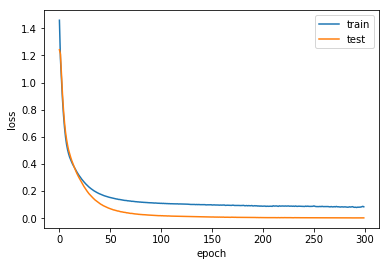

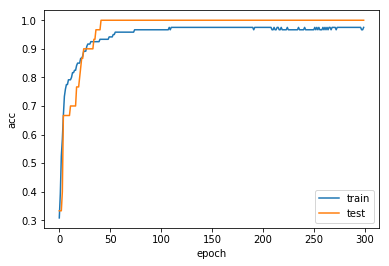

In [32]:
main(activation='relu')

# Sigmoid

sigmoid
Eopch: 49  Loss: 0.17654  ACC: 0.94167
Test  Loss: 0.08647  ACC: 1.00000
Eopch: 99  Loss: 0.10605  ACC: 0.96667
Test  Loss: 0.01740  ACC: 1.00000
Eopch: 149  Loss: 0.09164  ACC: 0.96667
Test  Loss: 0.00698  ACC: 1.00000
Eopch: 199  Loss: 0.08612  ACC: 0.97500
Test  Loss: 0.00404  ACC: 1.00000
Eopch: 249  Loss: 0.08328  ACC: 0.97500
Test  Loss: 0.00288  ACC: 1.00000
Eopch: 299  Loss: 0.08156  ACC: 0.97500
Test  Loss: 0.00230  ACC: 1.00000


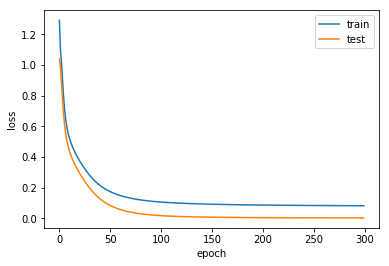

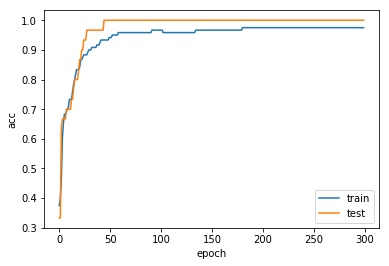

In [33]:
main(activation='sigmoid')

# Tanh

tanh
Eopch: 49  Loss: 0.13242  ACC: 0.95833
Test  Loss: 0.04444  ACC: 1.00000
Eopch: 99  Loss: 0.10482  ACC: 0.96667
Test  Loss: 0.01381  ACC: 1.00000
Eopch: 149  Loss: 0.09775  ACC: 0.97500
Test  Loss: 0.00809  ACC: 1.00000
Eopch: 199  Loss: 0.09370  ACC: 0.97500
Test  Loss: 0.00568  ACC: 1.00000
Eopch: 249  Loss: 0.09114  ACC: 0.96667
Test  Loss: 0.00439  ACC: 1.00000
Eopch: 299  Loss: 0.08918  ACC: 0.96667
Test  Loss: 0.00355  ACC: 1.00000


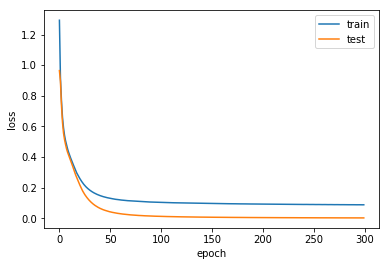

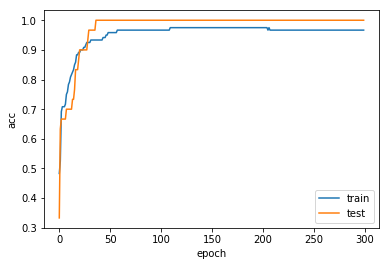

In [34]:
main(activation='tanh')

# Prelu

prelu
Eopch: 49  Loss: 0.13603  ACC: 0.95000
Test  Loss: 0.05043  ACC: 1.00000
Eopch: 99  Loss: 0.09408  ACC: 0.96667
Test  Loss: 0.00955  ACC: 1.00000
Eopch: 149  Loss: 0.08165  ACC: 0.97500
Test  Loss: 0.00369  ACC: 1.00000
Eopch: 199  Loss: 0.07883  ACC: 0.97500
Test  Loss: 0.00364  ACC: 1.00000
Eopch: 249  Loss: 0.07481  ACC: 0.98333
Test  Loss: 0.00432  ACC: 1.00000
Eopch: 299  Loss: 0.07269  ACC: 0.97500
Test  Loss: 0.00493  ACC: 1.00000


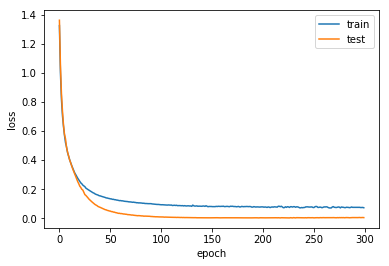

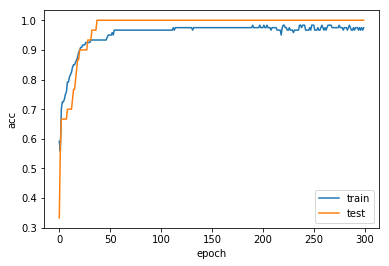

In [35]:
main(activation='prelu')